## Observations and Insights

1) Drug regimens Capomulin and Ramicane appear to have the smallest average tumor size at the final time point.

2) Tumor volume seems to decrease as time goes on with the Ceftamin treatment.

3) Tumor volume seems to increase (for the mouses treated with Cefftamin), as their weight increases. However, a correlatin coefficient of .84 tells us that we need to dig deeper. Is the volume of the tumor increasing proportionally as weight increases, or is the increase in tumor volume just a result from bigger mouses?


## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

regimens = mouse_study_data.groupby(['Drug Regimen'])

mean = round(regimens['Tumor Volume (mm3)'].mean(), 2)
median = round(regimens['Tumor Volume (mm3)'].median(), 2)
variance = round(regimens['Tumor Volume (mm3)'].var(), 2)
stdev = round(regimens['Tumor Volume (mm3)'].std(), 2)
SEM = round(regimens['Tumor Volume (mm3)'].sem(), 2)

summary_stats = pd.DataFrame({'Mean Tumor Vol (mm3)': mean,
                             'Median': median,
                             'Variance': variance,
                             'Standard Dev': stdev,
                             'SEM': SEM})

summary_stats

,Mean Tumor Vol (mm3),Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

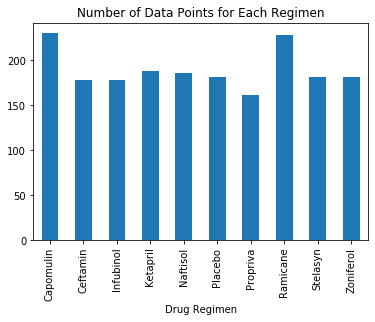

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = regimens['Drug Regimen'].count()
data_plot = data_points.plot(kind='bar', title= 'Number of Data Points for Each Regimen')

Text(0.5, 0, 'Drug Regimen')

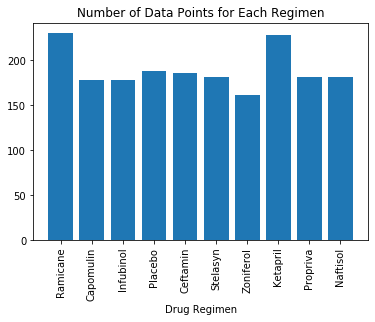

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points = regimens['Drug Regimen'].count()
x_axis = np.arange(len(summary_stats))

plt.bar(x_axis, data_points)

ticks = [regimen for regimen in x_axis]
unique_regimens = mouse_study_data['Drug Regimen'].drop_duplicates()

plt.xticks(ticks, unique_regimens, rotation='vertical')
plt.title('Number of Data Points for Each Regimen')
plt.xlabel('Drug Regimen')

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11de75ee0>],
      dtype=object)

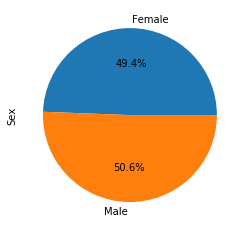

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = mouse_study_data.groupby(['Sex'])
gender_counts = genders['Sex'].count()
gender_counts.plot(kind='pie', autopct='%1.1f%%', subplots=True)

Text(0.5, 1.0, 'Sex')

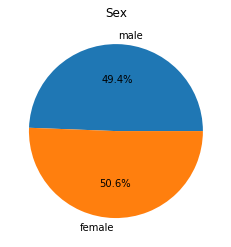

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = ['male', 'female']
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%')
plt.title('Sex')

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

mouses = mouse_study_data.loc[(mouse_study_data['Drug Regimen'] == 'Capomulin') | 
                             (mouse_study_data['Drug Regimen'] == 'Ramicane') | 
                             (mouse_study_data['Drug Regimen'] == 'Infubinol') | 
                             (mouse_study_data['Drug Regimen'] == 'Ceftamin'),
                              ['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

final_times = mouses.loc[mouses['Timepoint'] == 45]
capo_final_vols = final_times.loc[final_times['Drug Regimen'] == 'Capomulin', :]['Tumor Volume (mm3)']
rami_final_vols = final_times.loc[final_times['Drug Regimen'] == 'Ramicane', :]['Tumor Volume (mm3)']
infu_final_vols = final_times.loc[final_times['Drug Regimen'] == 'Infubinol', :]['Tumor Volume (mm3)']
ceft_final_vols = final_times.loc[final_times['Drug Regimen'] == 'Ceftamin', :]['Tumor Volume (mm3)']

quartiles = capo_final_vols.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile for Capomulin is: {lowerq}")
print(f"The upper quartile for Capomulin is: {upperq}")
print(f"The interquartile for Capomulin is: {iqr}")
print(f"The the median for Capomulin is: {round(quartiles[0.5], 2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print('')
print('--------------------------')
print('')

quartiles = rami_final_vols.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile for Ramicane is: {lowerq}")
print(f"The upper quartile for Ramicane is: {upperq}")
print(f"The interquartile for Ramicane is: {iqr}")
print(f"The the median for Ramicane is: {round(quartiles[0.5], 2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print('')
print('--------------------------')
print('')

quartiles = infu_final_vols.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile for Infubinol is: {lowerq}")
print(f"The upper quartile for Infubinol is: {upperq}")
print(f"The interquartile for Infubinol is: {iqr}")
print(f"The the median for Infubinol is: {round(quartiles[0.5], 2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print('')
print('--------------------------')
print('')

quartiles = ceft_final_vols.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile for Ceftamin is: {lowerq}")
print(f"The upper quartile for Ceftamin is: {upperq}")
print(f"The interquartile for Ceftamin is: {iqr}")
print(f"The the median for Ceftamin is: {round(quartiles[0.5], 2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Capomulin is: 32.38
The upper quartile for Capomulin is: 40.16
The interquartile for Capomulin is: 7.78
The the median for Capomulin is: 37.31 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.

--------------------------

The lower quartile for Ramicane is: 30.98
The upper quartile for Ramicane is: 38.51
The interquartile for Ramicane is: 7.53
The the median for Ramicane is: 34.85 
Values below 19.685000000000002 could be outliers.
Values above 49.805 could be outliers.

--------------------------

The lower quartile for Infubinol is: 62.75
The upper quartile for Infubinol is: 67.69
The interquartile for Infubinol is: 4.94
The the median for Infubinol is: 66.08 
Values below 55.34 could be outliers.
Values above 75.1 could be outliers.

--------------------------

The lower quartile for Ceftamin is: 61.43
The upper quartile for Ceftamin is: 67.53
The interquartile for Ceftamin is: 6.1
The the median for Ceftamin is: 64.3 
Values below 5

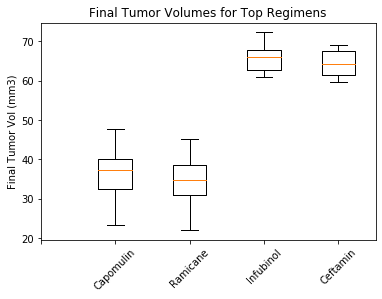

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
x_ticks = ['', 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
x_axis = np.arange(len(x_ticks))
tick_locations = [value for value in x_axis]
ax1.set_title('Final Tumor Volumes for Top Regimens')
ax1.set_ylabel('Final Tumor Vol (mm3)')
ax1.boxplot([capo_final_vols, rami_final_vols, infu_final_vols, ceft_final_vols])
plt.xticks(tick_locations, x_ticks, rotation=45)
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

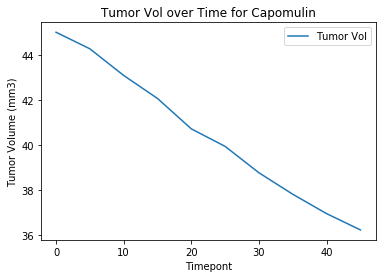

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_only = mouse_study_data.loc[(mouse_study_data['Drug Regimen'] == 'Capomulin'),  
                              ['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

capo_times = capo_only.groupby(['Timepoint'])['Tumor Volume (mm3)'].mean()

capo_vols, = plt.plot(capo_times, label= 'Tumor Vol')
plt.legend(handles=[capo_vols], loc='best')
plt.title('Tumor Vol over Time for Capomulin')
plt.xlabel('Timepont')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Tumor Volume (mm3)')

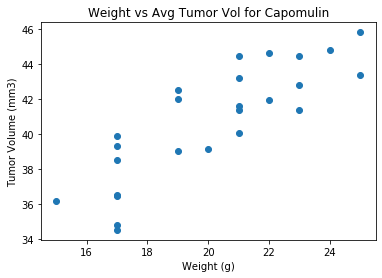

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_weights = mouse_study_data.loc[(mouse_study_data['Drug Regimen'] == 'Capomulin'),  
                              ['Mouse ID', 'Drug Regimen', 'Weight (g)', 'Tumor Volume (mm3)']]

capo_means = capo_weights.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
capo_weights = capo_weights.groupby(['Mouse ID'])['Weight (g)'].mean()

plt.scatter(capo_weights, capo_means)
plt.title('Weight vs Avg Tumor Vol for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

The r-squared is: 0.8419363424694718


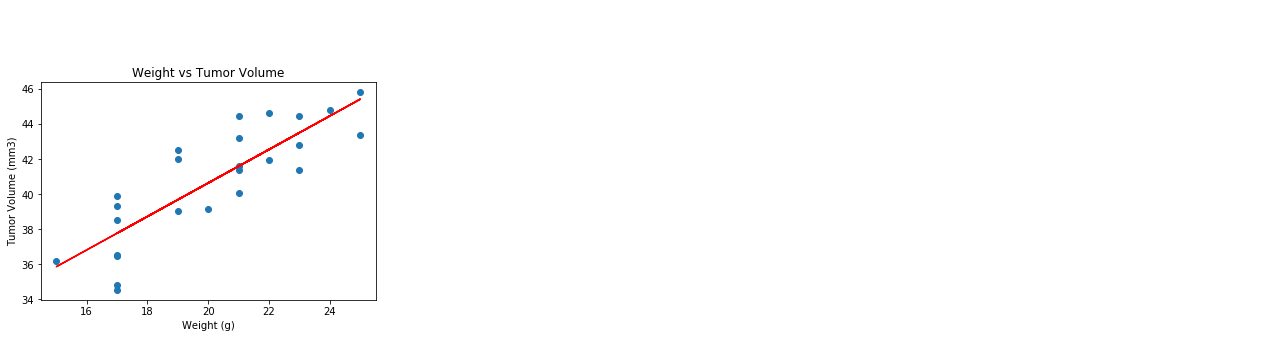

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_weights, capo_means)
regress_values = capo_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capo_weights, capo_means)
plt.plot(capo_weights,regress_values,"r-")
plt.annotate(line_eq, (50, 50), fontsize=15,color="red")
plt.title('Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")
plt.show()